# Classifying Data in Python using the $k$-Nearest Neighbors (KNN) Algorithm

In this notebook I will demonstrate training and using **$k$-nearest neighbors (KNN)** algorithms with **sklearn**.

We will be using the iris dataset, which I load below.

In [9]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import classification_report

In [10]:
iris_obj = load_iris()

flower, species = iris_obj.data, iris_obj.target

In [3]:
flower_train, flower_test, species_train, species_test = train_test_split(flower, species, test_size = 0.1)
flower_train[:5]

array([[ 7.6,  3. ,  6.6,  2.1],
       [ 5.2,  3.5,  1.5,  0.2],
       [ 6.7,  2.5,  5.8,  1.8],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.5,  1.3,  0.3]])

In [4]:
species_train[:5]

array([2, 0, 2, 0, 0])

## Creating a Classifier

The `KNeighborsClassifier` allows for fitting and predicting using the KNN algorithm. Recall that with KNN, training a model means saving the training data, and predicting is done by picking the most common algorithm the $k$ nearest neighbors of a point.

Besides choice of variables, there are two hyperparameters that need to be picked to use KNN: the number of neighbors $k$ used for prediction and the choice of metric for defining distance. Here I will use Euclidean distance, and I start by picking $k = 1$.

In [13]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

In [14]:
knn1 = KNeighborsClassifier(n_neighbors=1)    # Setting the k parameter
knn1.fit(flower_train, species_train)    # Fitting the model
knn1.predict(np.array([[7, 3, 5, 2]]))    # A test prediction

array([2])

In [15]:
pred1 = knn1.predict(flower_train)
pred1

array([2, 0, 2, 0, 0, 1, 0, 1, 2, 0, 0, 2, 1, 1, 1, 1, 2, 2, 0, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 0, 1, 0, 1, 2, 2, 0, 2, 0, 1, 0, 2, 1, 0, 0, 2, 2, 0,
       2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 0, 2, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 2, 1, 1, 1, 0, 2, 2, 0, 2, 2, 0, 0, 1, 2, 2, 0, 0, 0, 1, 1, 1, 2,
       2, 0, 0, 1, 0, 0, 0, 2, 1, 0, 1, 1, 1, 2, 0, 2, 1, 0, 2, 0, 0, 1, 2,
       0, 1, 2, 0, 1, 1, 1, 0, 1, 1, 2, 2, 0, 1, 0, 0, 2, 2, 2, 0])

In [16]:
print(classification_report(species_train, pred1))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        46
          1       1.00      1.00      1.00        45
          2       1.00      1.00      1.00        44

avg / total       1.00      1.00      1.00       135



*Of course* the model does perfectly on the training data! (How can it not?)

## Choosing $k$

Let's perform cross-validation to see what $k$ seems to lead to the best predictive accuracy, along with getting a sense of what level of accuracy in prediction we can hope to see.

In [17]:
import pandas as pd
from pandas import DataFrame

In [18]:
k_candidate = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
res = dict()

for k in k_candidate:
    pred2 = KNeighborsClassifier(n_neighbors=k)
    res[k] = cross_validate(estimator=pred2,    # The predictor
                            X=flower_train,     # Features array
                            y=species_train,    # Target array
                            cv=10,              # Number of folds (but other meanings exist)
                            return_train_score=False,    # Don't return training scores
                            scoring='accuracy') # What scores to return (other meanings exist)

In [19]:
resdf = DataFrame({(i, j): res[i][j]
                             for i in res.keys()
                             for j in res[i].keys()}).T
resdf

0         1         2         3         4         5  \
1  fit_time    0.001001  0.000500  0.000501  0.000514  0.000500  0.000500   
   score_time  0.001000  0.000500  0.000500  0.000499  0.000501  0.000501   
   test_score  1.000000  1.000000  1.000000  0.933333  0.928571  1.000000   
2  fit_time    0.000000  0.000000  0.001001  0.000000  0.001013  0.000000   
   score_time  0.001000  0.001000  0.000000  0.001001  0.000000  0.000990   
   test_score  1.000000  1.000000  1.000000  0.933333  0.928571  0.923077   
3  fit_time    0.000000  0.000000  0.000000  0.001004  0.000998  0.000000   
   score_time  0.000991  0.001000  0.001001  0.000997  0.000000  0.000999   
   test_score  1.000000  1.000000  1.000000  0.933333  0.928571  1.000000   
4  fit_time    0.000000  0.000000  0.001003  0.000000  0.000000  0.000000   
   score_time  0.000999  0.001001  0.000000  0.000000  0.000000  0.001006   
   test_score  1.000000  1.000000  1.000000  0.933333  0.857143  1.000000   
5  fit_time    0.000999  0.000000  0.000000  0.000000  0.000000  0.000995   
   score_time  0.000000  0.000000  0.000987  0.001000  0.001022  0.000526   
   test_score  0.933333  1.000000  1.000000  0.933333  0.928571  1.000000   
6  fit_time    0.000000  0.000000  0.000000  0.001000  0.000000  0.000000   
   score_time  0.001001  0.001000  0.000985  0.000000  0.000000  0.000000   
   test_score  0.933333  1.000000  1.000000  0.933333  0.928571  1.000000   
7  fit_time    0.001000  0.000000  0.000000  0.000000  0.000000  0.000000   
   score_time  0.000000  0.001001  0.001000  0.001001  0.001001  0.001000   
   test_score  0.933333  1.000000  1.000000  0.933333  0.928571  1.000000   
8  fit_time    0.000484  0.000501  0.000000  0.000000  0.000000  0.000000   
   score_time  0.000517  0.000000  0.000482  0.000500  0.000501  0.000501   
   test_score  0.933333  1.000000  1.000000  0.933333  0.928571  1.000000   
9  fit_time    0.000000  0.000484  0.000500  0.000000  0.000000  0.000000   
   score_time  0.000500  0.000500  0.000000  0.000501  0.001004  0.001001   
   test_score  0.933333  1.000000  1.000000  0.933333  0.928571  1.000000   
10 fit_time    0.000000  0.000000  0.000000  0.001000  0.001001  0.001000   
   score_time  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
   test_score  0.933333  1.000000  1.000000  0.933333  0.857143  1.000000   

                      6         7         8         9  
1  fit_time    0.000501  0.000000  0.001001  0.000000  
   score_time  0.000499  0.001005  0.000000  0.000000  
   test_score  0.833333  1.000000  0.833333  1.000000  
2  fit_time    0.001001  0.001001  0.000000  0.000000  
   score_time  0.000000  0.000000  0.001003  0.001012  
   test_score  0.750000  1.000000  0.833333  0.916667  
3  fit_time    0.001001  0.000999  0.001014  0.000000  
   score_time  0.001002  0.001001  0.000000  0.000986  
   test_score  0.833333  1.000000  0.833333  1.000000  
4  fit_time    0.000000  0.000500  0.001009  0.000000  
   score_time  0.000646  0.001000  0.001001  0.001013  
   test_score  0.750000  1.000000  0.916667  0.916667  
5  fit_time    0.000517  0.000000  0.000000  0.000000  
   score_time  0.000497  0.000000  0.000997  0.001000  
   test_score  0.833333  1.000000  0.916667  1.000000  
6  fit_time    0.000000  0.000000  0.000000  0.001000  
   score_time  0.001001  0.000999  0.001022  0.000000  
   test_score  0.833333  1.000000  0.916667  0.916667  
7  fit_time    0.000000  0.000000  0.000000  0.000000  
   score_time  0.000000  0.000000  0.000000  0.000520  
   test_score  0.833333  1.000000  0.916667  0.916667  
8  fit_time    0.000500  0.000500  0.000499  0.000500  
   score_time  0.000501  0.000501  0.000501  0.000000  
   test_score  0.833333  1.000000  1.000000  0.916667  
9  fit_time    0.000000  0.000000  0.000000  0.000000  
   score_time  0.001019  0.001000  0.001001  0.001000  
   test_score  0.833333  1.000000  1.000000  1.000000  
10 fit_time    0.000000  0.000000  0.000000  0.000000  
   score_t

In [20]:
resdf.loc[(slice(None), 'test_score'), :]

,,0,1,2,3,4,5,6,7,8,9
1,test_score,1.000000,1.0,1.0,0.933333,0.928571,1.000000,0.833333,1.0,0.833333,1.000000
2,test_score,1.000000,1.0,1.0,0.933333,0.928571,0.923077,0.750000,1.0,0.833333,0.916667
3,test_score,1.000000,1.0,1.0,0.933333,0.928571,1.000000,0.833333,1.0,0.833333,1.000000
4,test_score,1.000000,1.0,1.0,0.933333,0.857143,1.000000,0.750000,1.0,0.916667,0.916667
5,test_score,0.933333,1.0,1.0,0.933333,0.928571,1.000000,0.833333,1.0,0.916667,1.000000
6,test_score,0.933333,1.0,1.0,0.933333,0.928571,1.000000,0.833333,1.0,0.916667,0.916667
7,test_score,0.933333,1.0,1.0,0.933333,0.928571,1.000000,0.833333,1.0,0.916667,0.916667
8,test_score,0.933333,1.0,1.0,0.933333,0.928571,1.000000,0.833333,1.0,1.000000,0.916667
9,test_score,0.933333,1.0,1.0,0.933333,0.928571,1.000000,0.833333,1.0,1.000000,1.000000
10,test_score,0.933333,1.0,1.0,0.933333,0.857143,1.000000,0.833333,1.0,1.000000,0.916667


In [21]:
resdf.loc[(slice(None), 'test_score'), :].mean(axis=1)

1   test_score    0.952857
2   test_score    0.928498
3   test_score    0.952857
4   test_score    0.937381
5   test_score    0.954524
6   test_score    0.946190
7   test_score    0.946190
8   test_score    0.954524
9   test_score    0.962857
10  test_score    0.947381
dtype: float64

It seems that the best accuracy is attained when $k = 9$. Let's see how our classifier does on the test set.  It can be slightly different in your Cross validation check

In [22]:
pred3 = KNeighborsClassifier(n_neighbors=8)
pred3.fit(flower_train, species_train)
species_test_predict = pred3.predict(flower_test)
print(classification_report(species_test, species_test_predict))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00         4
          1       1.00      1.00      1.00         5
          2       1.00      1.00      1.00         6

avg / total       1.00      1.00      1.00        15



Our KNN classifier does well predicting the setosa species, and the worst behavior is for the virginica species.

Considering the graphic below, where species correctly predicted are shown in blue and those incorrectly predicted in red (with shape corresponding to species), we can see this result should be expected; setosa flowers are easily identified while versicolor and virginica would be more difficult to predict.

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

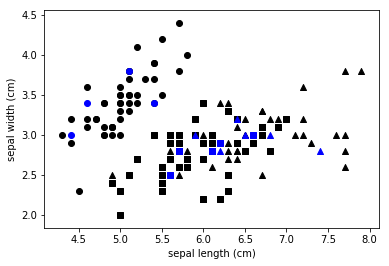

In [24]:
marker_map = {0: 'o', 1: 's', 2: '^'}
var1, var2 = 0, 1    # Sepal length and sepal width variables
for length, width, species in zip(flower_train[:, var1], flower_train[:, var2], species_train[:]):
    plt.scatter(x=length, y=width, marker=marker_map[species], c="black")
# Plot correct prediction
correct = (species_test == species_test_predict)
for length, width, species in zip(flower_test[correct, var1], flower_test[correct, var2], species_test[correct]):
    plt.scatter(x=length, y=width, marker=marker_map[species], c="blue")
for length, width, species in zip(flower_test[np.logical_not(correct), var1],
                                  flower_test[np.logical_not(correct), var2],
                                  species_test[np.logical_not(correct)]):
    plt.scatter(x=length, y=width, marker=marker_map[species], c="red")
plt.xlabel(iris_obj.feature_names[var1])
plt.ylabel(iris_obj.feature_names[var2])
plt.show()

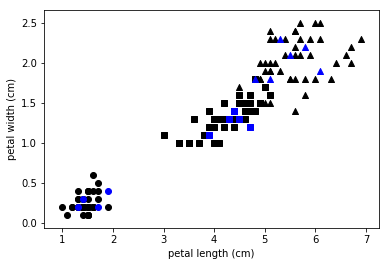

In [25]:
marker_map = {0: 'o', 1: 's', 2: '^'}
var1, var2 = 2, 3    # Petal length and petal width variables
for length, width, species in zip(flower_train[:, var1], flower_train[:, var2], species_train[:]):
    plt.scatter(x=length, y=width, marker=marker_map[species], c="black")
# Plot correct prediction
correct = (species_test == species_test_predict)
for length, width, species in zip(flower_test[correct, var1], flower_test[correct, var2], species_test[correct]):
    plt.scatter(x=length, y=width, marker=marker_map[species], c="blue")
for length, width, species in zip(flower_test[np.logical_not(correct), var1],
                                  flower_test[np.logical_not(correct), var2],
                                  species_test[np.logical_not(correct)]):
    plt.scatter(x=length, y=width, marker=marker_map[species], c="red")
plt.xlabel(iris_obj.feature_names[var1])
plt.ylabel(iris_obj.feature_names[var2])
plt.show()